In [8]:
from uselib import det_single_img
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer
from detectron2.structures import Instances
from fvcore.common.timer import Timer

thing_classes = ['smoking']
allimagesfiles=[]
tt=Timer()
tt.pause()
with open('cfg/train.txt','r') as fid:
    allimagesfiles.extend([x for x in list(map(str.strip,fid.readlines())) if 'baidu' in x ])
#     allimagesfiles.extend([x for x in list(map(str.strip,fid.readlines())) if 'car' in x])
xx=iter([allimagesfiles[x] for x  in np.random.choice(len(allimagesfiles),len(allimagesfiles),replace=False)])  
def convertBack(detection):
    x, y, w, h = detection
    x, y, w, h = float(x), float(y), float(w), float(h)
    xmin = int(round(x - (w / 2)))
    xmax = int(round(x + (w / 2)))
    ymin = int(round(y - (h / 2)))
    ymax = int(round(y + (h / 2)))
    return xmin, ymin, xmax, ymax

In [2]:
yoyo = det_single_img(configPath="cfg/smoke.cfg", weightPath="cfg/smoke_35000.weights",
                 metaPath="cfg/smoke.data",gpu_id=13)

In [3]:
valfiles=iter(list(glob.glob('xx/*')))

0
******** one shot detect time is 19.93 and 0 fps.file is picturefrombaidubing/c09f06f7184747a8ae59544db0fb15cf.jpg ********


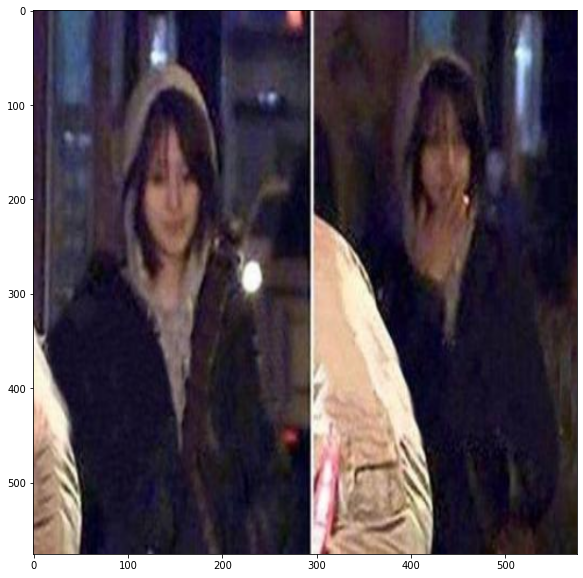

In [23]:
frame_read_file_name=next(xx)
# frame_read_file_name='picturefromavis/efafc50c6b884f92a4fb349b0bd808aa.jpg'
img=cv2.imread(frame_read_file_name)
tt.reset()
predicts, ddimg = yoyo.detect(img)
tt.pause()
vlz = Visualizer(ddimg, {"thing_classes": thing_classes}, instance_mode=1)
        # "pred_boxes":,"scores","pred_classes"
instance = Instances(yoyo.getsize(),
                     **{"pred_boxes": np.array(list(map(convertBack, [x[2] for x in predicts]))),
                        "scores": np.array([x[1] for x in predicts]),
                        "pred_classes": np.array([thing_classes.index(x[0]) for x in predicts])})
vout = vlz.draw_instance_predictions(predictions=instance)
kitchen_img_resized = vout.get_image()
plt.figure(figsize=(10,10))
plt.imshow(kitchen_img_resized)
for i in predicts:print(i)
print(f'******** one shot detect time is {tt.seconds():.2f} and {int(float(1/tt.seconds()))} fps.file is {frame_read_file_name} ********')